# Attempt 6 - Cross Validation

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('../input/train.csv', index_col='Id')
test_data = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [3]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


### Turn into function

In [4]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    my_pipeline= Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model',RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                cv=3,
                                scoring='neg_mean_absolute_error')
    
    return scores.mean()

### Find the best parameter value

In [6]:
results = {} # from 50, 100, 150, ..., 300, 350, 400
for i in range(1,9):
    results[50*i] = get_score(50*i)

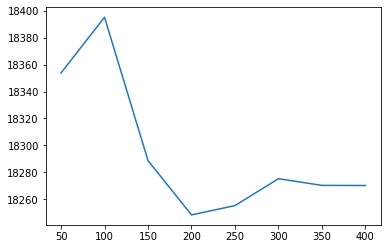

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [13]:
nr_estimator_best=200

## Test

In [20]:
# Define and fit model
my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=nr_estimator_best, random_state=0))
])

my_pipeline.fit(X,y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('model',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=200, n_jobs=None,
                                       oob_score=False, random_state=0,
                          

In [21]:
simple_imputer = SimpleImputer()
simple_imputer.fit_transform(X)
imputed_X_test = pd.DataFrame(simple_imputer.transform(X_test))
imputed_X_test.columns = X_test.columns

# Fill in the line below: get test predictions
preds_test = my_pipeline.predict(imputed_X_test)

# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('../output/submission006.csv', index=False)